In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger
import os
import sys
from sklearn.preprocessing import StandardScaler
root = "/project/wyin/jlee/ml-project/"
util_loc = os.path.join(root, "utils")
sys.path.append(util_loc)
from forward_utilities import LitNeuralNet, ScaledData, see_results

data_loc = os.path.join(root, "dos-prediction-full/data")
model_loc = os.path.join(root, "dos-prediction-full/neural-nets/hyperparameter-search/logs/arch-search-30min/")

In [2]:
for name in os.listdir(model_loc):
    start = name.index('[')
    end = name.index(']')
    print(name[start:end + 1])

[3, 32, 64, 128, 256, 301]
[3, 128, 256, 512, 1024, 301]
[3, 128, 256, 384, 512, 301]
[3, 42, 84, 126, 168, 210, 252, 301]
[3, 64, 128, 192, 256, 301]
[3, 85, 170, 255, 340, 425, 510, 301]
[3, 64, 128, 256, 512, 301]
[3, 170, 340, 510, 680, 850, 1020, 301]
[3, 32, 64, 128, 256, 512, 1024, 301]
[3, 8, 16, 32, 64, 128, 256, 301]
[3, 16, 32, 64, 128, 256, 512, 301]
[3, 256, 512, 768, 1024, 301]


In [2]:
#Get model
def model_results(architecture):
    check_dir = os.path.join(model_loc, f"{architecture},0.001,1024,0.5/version_0/checkpoints")

    check_dir = os.path.join(root, check_dir)
    check_file = os.path.join(check_dir, os.listdir(check_dir)[0])
    model = LitNeuralNet.load_from_checkpoint(check_file)
    
    data = ScaledData(data_loc)

    test_dos_tensor = torch.from_numpy(data.test_params).float()
    predicted = model.forward_prop(test_dos_tensor).detach().numpy()
    
    see_results(predicted, data.test_dos, (2, 2), np.arange(0, 8, 2))

[3, 42, 84, 126, 168, 210, 252, 301]:
model mse: 2.634991777959506e-05


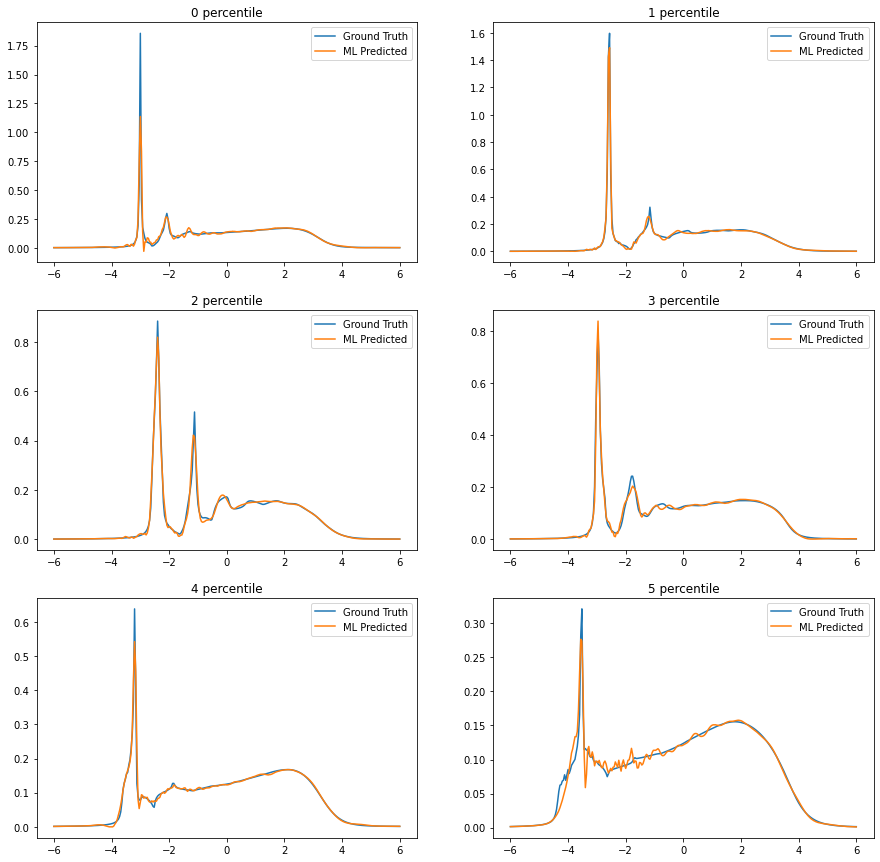

In [4]:
architecture = '[3, 42, 84, 126, 168, 210, 252, 301]'
print(f"{architecture}:")
model_results(architecture)

[3, 85, 170, 255, 340, 425, 510, 301]:
model mse: 1.1719741091630411e-05


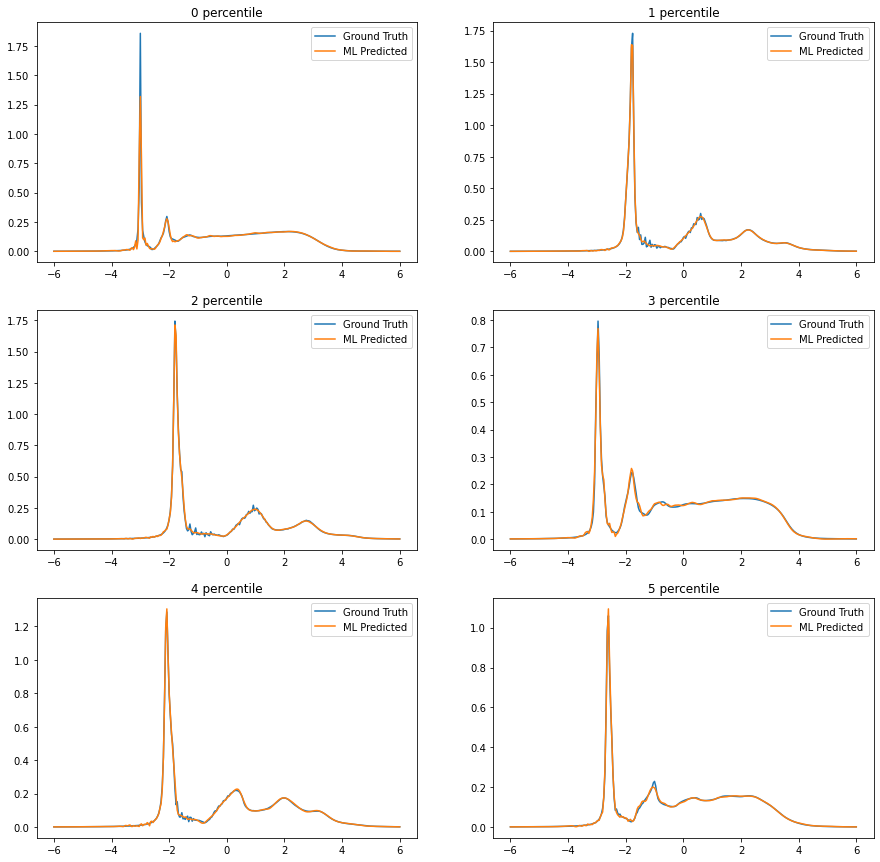

In [5]:
architecture = '[3, 85, 170, 255, 340, 425, 510, 301]'
print(f"{architecture}:")
model_results(architecture)

[3, 170, 340, 510, 680, 850, 1020, 301]:
model mse: 7.235938276353289e-06


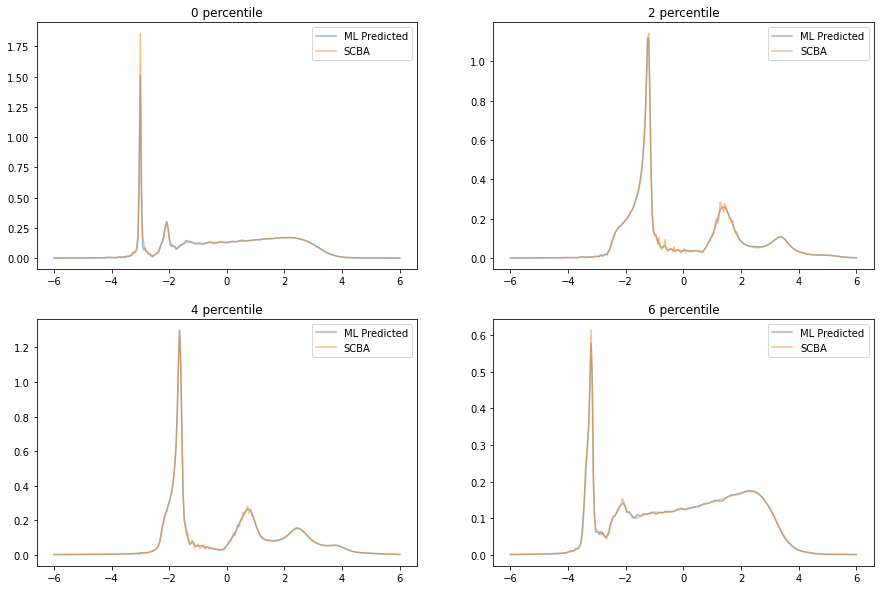

In [3]:
architecture = '[3, 170, 340, 510, 680, 850, 1020, 301]'
print(f"{architecture}:")
model_results(architecture)